In [1]:
import json,folium, pandas as pd,matplotlib.pyplot as plt, seaborn as sns,numpy as np

sns.set_context("paper")
sns.set_style("darkgrid")

In [2]:
dt=pd.read_csv("dataset/SMEs_reformated.csv",index_col=0)
us_state_abbrev = json.load(open("dataset/us-states-abb.json"))
state_geo = json.load(open("dataset/us-states.json"))
geo_info=pd.read_csv("dataset/geo_info.csv")

# SMEs Map

In [3]:
state_level_smes=dt[(dt['ENTERPRISE EMPLOYMENT SIZE']=="19:  <500")&(dt['NAICS DESCRIPTION']=='Total')&(dt['GEOGRAPHIC AREA DESCRIPTION']!='United States')]
state_level_smes=pd.merge(left=state_level_smes,right=geo_info,left_on=' FIPS  CODE',right_on='FIPS')
del state_level_smes['FIPS']
state_level_smes['NUMBER OF FIRMS INT']=[int(num.replace(',',"")) for num in state_level_smes['NUMBER OF FIRMS']]
state_level_smes['State']=[us_state_abbrev[state] for state in state_level_smes['GEOGRAPHIC AREA DESCRIPTION']]

In [4]:
m = folium.Map(location=[47, -102], zoom_start=4,no_touch=True)
folium.Choropleth(
    geo_data=state_geo,
    data=state_level_smes,
    columns=['State', 'NUMBER OF FIRMS INT'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Num. of SMEs',
    sdafdsa=True
).add_to(m)
for idx in state_level_smes.index:
    folium.CircleMarker(
        location=[state_level_smes.loc[idx,'LATITUDE'],state_level_smes.loc[idx,'LONGITUDE']],
        fill=True,
        tooltip="{}, Total Num. of SMEs: {}".format(state_level_smes.loc[idx,'GEOGRAPHIC AREA DESCRIPTION'],state_level_smes.loc[idx,'NUMBER OF FIRMS']),
    ).add_to(m)

In [5]:
m.save('maps/total_SMEs.html')
m

# Manufacturing SMEs Map

In [43]:
state_level_smes=dt[(dt['ENTERPRISE EMPLOYMENT SIZE']=="19:  <500")&(dt['NAICS DESCRIPTION']=='Manufacturing')&(dt['GEOGRAPHIC AREA DESCRIPTION']!='United States')]
state_level_smes=pd.merge(left=state_level_smes,right=geo_info,left_on=' FIPS  CODE',right_on='FIPS')
del state_level_smes['FIPS']
state_level_smes['NUMBER OF FIRMS INT']=[int(num.replace(',',"")) for num in state_level_smes['NUMBER OF FIRMS']]
state_level_smes['State']=[us_state_abbrev[state] for state in state_level_smes['GEOGRAPHIC AREA DESCRIPTION']]

In [7]:
m = folium.Map(location=[47, -102], zoom_start=4,no_touch=True)
folium.Choropleth(
    geo_data=state_geo,
    data=state_level_smes,
    columns=['State', 'NUMBER OF FIRMS INT'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Num. of SMEs in Manufacturing',
    sdafdsa=True
).add_to(m)
for idx in state_level_smes.index:
    folium.CircleMarker(
        location=[state_level_smes.loc[idx,'LATITUDE'],state_level_smes.loc[idx,'LONGITUDE']],
        fill=True,
        tooltip="{}, Num. of SMEs: {}".format(state_level_smes.loc[idx,'GEOGRAPHIC AREA DESCRIPTION'],state_level_smes.loc[idx,'NUMBER OF FIRMS']),
    ).add_to(m)

In [8]:
m.save('maps/Mfg_SMEs.html')
m

# State Level COVID19 Cases

In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
df['date']=pd.to_datetime(df['date'])
df['State_FIPS']=[int(str(fip)[:-5]) if str(fip)[:-5]!="" else 0 for fip in df.fips]
df.head()

,date,county,state,fips,cases,deaths,State_FIPS
0,2020-01-21,Snohomish,Washington,53061.0,1,0,53
1,2020-01-22,Snohomish,Washington,53061.0,1,0,53
2,2020-01-23,Snohomish,Washington,53061.0,1,0,53
3,2020-01-24,Cook,Illinois,17031.0,1,0,17
4,2020-01-24,Snohomish,Washington,53061.0,1,0,53


In [44]:
cases=df[df['date']==df.date.max()][['State_FIPS','cases']].groupby(['State_FIPS']).sum().reset_index(drop=False)

In [45]:
state_level_smes=pd.merge(left=state_level_smes,right=cases,left_on=" FIPS  CODE",right_on="State_FIPS")
del state_level_smes['State_FIPS']

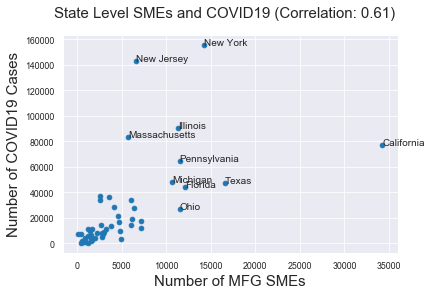

In [74]:
plt.scatter(state_level_smes['NUMBER OF FIRMS INT'],state_level_smes['cases'])
plt.xlabel("Number of MFG SMEs",size=15)
plt.ylabel("Number of COVID19 Cases",size=15)
plt.suptitle("State Level SMEs and COVID19 (Correlation: {:.2f})".format(state_level_smes.corr()['cases']['NUMBER OF FIRMS INT']),size=15)
for idx in state_level_smes.index:
    if state_level_smes.loc[idx,'NUMBER OF FIRMS INT']>=10000 or state_level_smes.loc[idx,'cases']>=40000:
        plt.text(state_level_smes.loc[idx,'NUMBER OF FIRMS INT'],state_level_smes.loc[idx,'cases'],s=state_level_smes.loc[idx,'GEOGRAPHIC AREA DESCRIPTION'])
plt.show()